Take-Home Challenge: Ultimate Technologies Inc.

Part 1 - EDA

In [47]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Read login data
logins = pd.read_json("logins.json", convert_dates=True)

In [22]:
#Add "N" column to count
logins2 = logins.set_index("login_time")
logins2["N"] = 1
logins2.head()

,N
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [72]:
#Group by day and count
loginsday = logins2.resample("D").count()

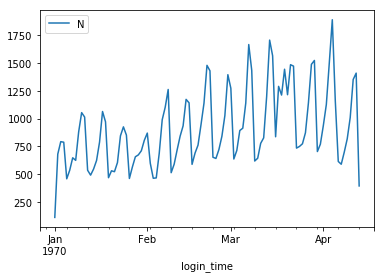

In [73]:
loginsday.plot()

One can see the logins seem to exhibit a strong weekly pattern. Let's look into this pattern further

In [110]:
#Reshape to Weekly values
logins_reshaped = pd.DataFrame()


for i, row in loginsday.iloc[4:,:].iterrows():
    day = i.weekday()
    if day == 0:
        index = i
    logins_reshaped.loc[index, day] = row["N"]
    
logins_reshaped.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
logins_reshaped.dropna(axis=0, inplace=True)

In [111]:
logins_reshaped.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1970-01-05,459.0,536.0,648.0,625.0,881.0,1054.0,1014.0
1970-01-12,536.0,492.0,547.0,624.0,789.0,1064.0,971.0
1970-01-19,469.0,531.0,523.0,605.0,845.0,926.0,852.0
1970-01-26,462.0,565.0,657.0,674.0,711.0,805.0,870.0
1970-02-02,599.0,464.0,467.0,688.0,990.0,1102.0,1262.0


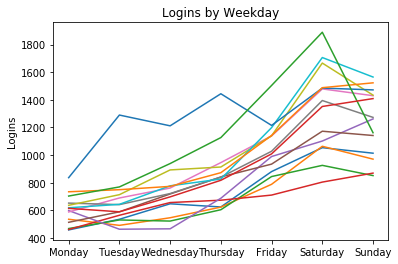

In [338]:
#Plot all weeks
for i, row in logins_reshaped.iterrows():
    plt.plot(logins_reshaped.columns, row)

plt.title("Logins by Weekday")
plt.ylabel("Logins")
plt.show()

One can see that logins generally increases throughout the week and peaks on Saturdays

Let's look at the daily patterns by looking at the data in 15 min intervals

In [ ]:
#Group by 15 min intervals and count
logins15 = logins2.resample("15T").count()

In [131]:
#Reshape to daily values
logins_reshaped_15 = pd.DataFrame()


for i, row in logins15.iloc[16:,:].iterrows():
    time = i.time()
    if (i.hour == 0) & (i.minute == 0):
        index = i
    logins_reshaped_15.loc[index, time] = row["N"]
    
# logins_reshaped.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
logins_reshaped_15.dropna(axis=0, inplace=True)

In [133]:
logins_reshaped_15.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
1970-01-02,10.0,18.0,12.0,13.0,9.0,8.0,10.0,6.0,7.0,18.0,...,11.0,14.0,15.0,18.0,21.0,17.0,12.0,12.0,12.0,15.0
1970-01-03,5.0,10.0,7.0,17.0,13.0,13.0,17.0,11.0,22.0,21.0,...,6.0,10.0,12.0,15.0,19.0,17.0,13.0,17.0,12.0,15.0
1970-01-04,11.0,14.0,15.0,12.0,7.0,15.0,29.0,25.0,21.0,32.0,...,4.0,6.0,9.0,4.0,6.0,7.0,2.0,7.0,5.0,6.0
1970-01-05,8.0,3.0,7.0,4.0,7.0,5.0,7.0,5.0,5.0,1.0,...,6.0,4.0,4.0,8.0,3.0,10.0,7.0,6.0,7.0,5.0
1970-01-06,7.0,4.0,7.0,7.0,8.0,5.0,5.0,4.0,4.0,5.0,...,8.0,23.0,24.0,19.0,11.0,12.0,9.0,7.0,7.0,8.0


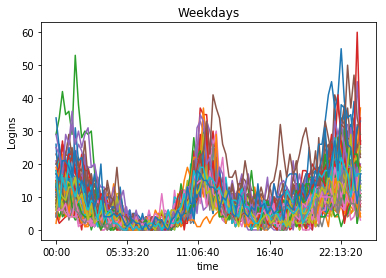

In [345]:
#Plot all weekdays
for i, row in logins_reshaped_15.iterrows():
    if i.weekday() != 5 and i.weekday() != 6:
        plt.plot(logins_reshaped_15.columns, row)

plt.title("Weekdays")
plt.ylabel("Logins")
plt.show()

One can see a clear pattern during weekdays, where logins seem to peak both late at night and during lunchtime

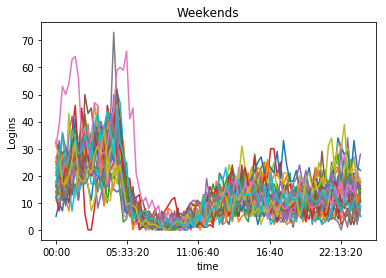

In [340]:
#Plot all weekends
for i, row in logins_reshaped_15.iterrows():
    if i.weekday() == 5 or i.weekday() == 6:
        plt.plot(logins_reshaped_15.columns, row)

plt.title("Weekends")
plt.ylabel("Logins")
plt.show()

Weekends seem to exhibit a different pattern, with a peak late at night, a dip in the morning, and then a sligt increase throughout the rest of the day

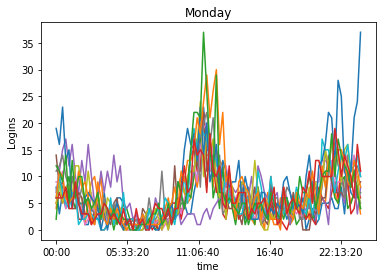

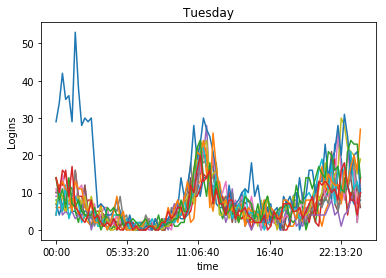

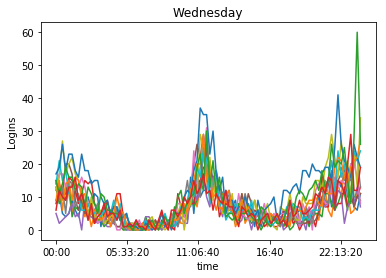

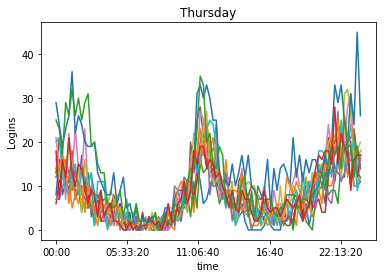

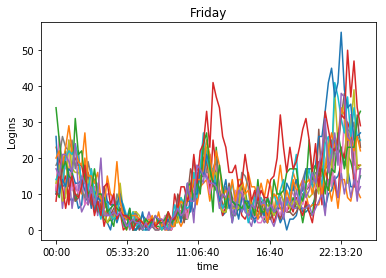

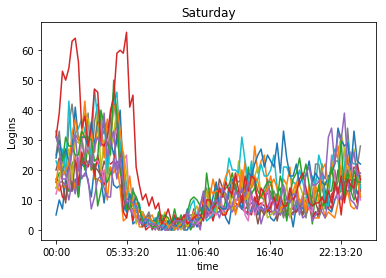

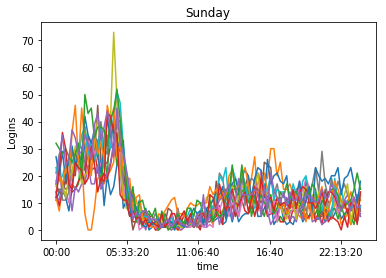

In [341]:
#Plot all days of week
titles = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in range(0,7):
    for i, row in logins_reshaped_15.iterrows():
  
        if i.weekday() == day:
            plt.plot(logins_reshaped_15.columns, row)
    plt.title(titles[day])
    plt.ylabel("Logins")
    plt.show()

Part 2 - Experiment and metrics design

As key performance indicators in this scenario I would consider a couple of options. One would be revenue, another would be number of bridge crossings, and a third would be the proportion of dropoffs/pickups that occur outside the typically preferred city of the driver. 

The number of bridge crossings might not be a good indicator as a driver may drive across but only briefly spend time in another city, therefore it doesn't really measure "availability" of the driver in both cities. Revenue might be the ultimate goal of paying the tolls and having drivers available in both cities, but revenue can be caused by a variety of other factors and it may not be the exact goal of the test. Therefore, I believe that the proportion of dropoffs/pickups that occur outside of a drivers typically preferred city would be the best KPI.

To test this, I would first pick a past time period as a control. Looking at the login data (and assuming this is any indication of rides) it appears that there are definitely weekly and daily cycles, and perhaps seasonal cycles although we cannot see a full year of data. Therefore, I may pick as a control the corresponding week/month of the previous year (in order to account for seasonality). I would then calculate the total number of dropoffs/pickups, and the percentage of those that occured outside a drivers preferred city. In order to assign what the preferred city of the driver is, I would simply pick the city where over 50% of the drivers dropoffs/pickups occured. 

I would then make the proposed changes to the toll fare, and observe ridership data over the course of a week/month. I would then calculate the same KPI (percentage of dropoffs/pickups that occur outside the drivers preferred city) over this time period. I would then perform a proportional t-test between the control and the test KPI to determine a p-value and determine with a certain degree of confidence whether or not any differences were just due to random chance.

I would then take this to the city operations team and say with a certain degree of confidence whether or not the changes improved the availability of the drivers in both cities. The one caveat would be the assumption that all other variables were controlled for.

Part 3 - Predictive Modeling

In [367]:
#Read Data
import json

text=open('ultimate_data_challenge.json','r')
x=text.read()

y=json.loads(x)
ultimate=pd.DataFrame(y)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [211]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The question does not clarify what day it is, and therefore we cannot decipher whether the rider has taken a ride the "preceeding 30 days", therefore we cannot determine whether or not any rider is "retained". Therefore, I will assume the date of reference is the latest date in the column "last_trip_date"

In [253]:
ultimate.last_trip_date = pd.to_datetime(ultimate.last_trip_date)
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)

In [213]:
sorted(ultimate.last_trip_date)[-1]

Timestamp('2014-07-01 00:00:00')

Last trip was 7/1/2014, therefore "retained" will be defined as having their last trip be after 6/1/2014

In [254]:
retained_cutoff = pd.to_datetime('2014-06-01')

In [255]:
#Add retained label
ultimate["retained"] = ultimate.apply(lambda row: 1 if row["last_trip_date"] > retained_cutoff else 0, axis=1)

In [216]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


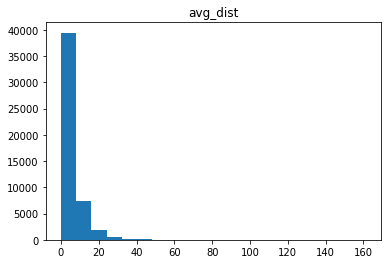

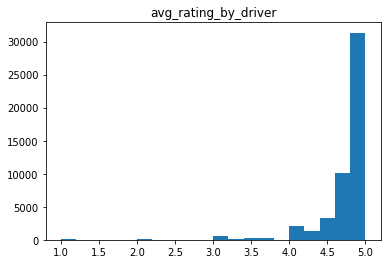

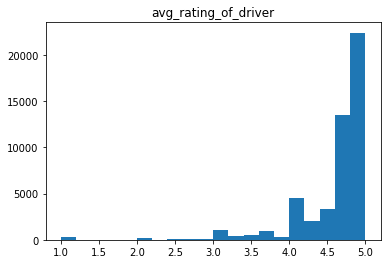

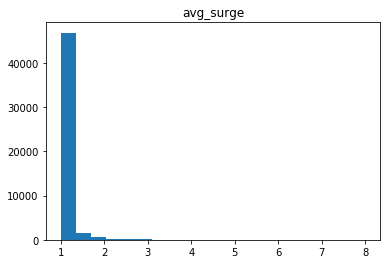

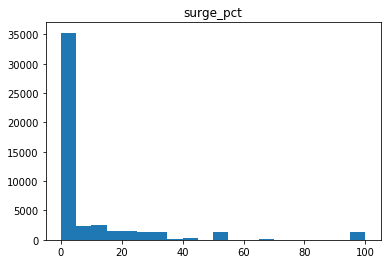

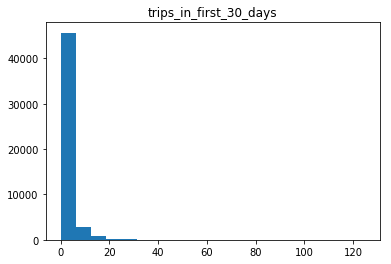

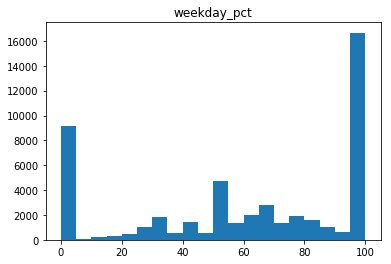

In [350]:
#Plot distributions
continuous_cols = ["avg_dist", "avg_rating_by_driver","avg_rating_of_driver", "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]

for col in continuous_cols:
    plt.hist(ultimate[col], bins=20)
    plt.title(col)
    plt.show()

In [351]:
#Import modeling packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ttest_ind
from sklearn.model_selection import GridSearchCV

In [257]:
#Impute means for avg_rating_by_driver and avg_rating_of_driver
ultimate.avg_rating_by_driver = ultimate.avg_rating_by_driver.replace(np.nan, ultimate.avg_rating_by_driver.mean())
ultimate.avg_rating_of_driver = ultimate.avg_rating_of_driver.replace(np.nan, ultimate.avg_rating_of_driver.mean())

In [258]:
#Drop remaining 396 rows
ultimate.dropna(inplace=True, axis=0)
ultimate.reset_index(inplace=True)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 14 columns):
index                     49604 non-null int64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
retained                  49604 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 5.0+ MB


In [279]:
#One hot encoding categoricals
categorical_data = ultimate.loc[:,["city", "phone", "ultimate_black_user"]]
encoder = OneHotEncoder(categories="auto", sparse=False, drop='first')
enc_cat_data = pd.DataFrame(encoder.fit_transform(categorical_data))
enc_cat_data.columns = encoder.get_feature_names()
modified_ultimate = ultimate.drop(["city", "phone", "ultimate_black_user", "last_trip_date", "signup_date","index"], axis=1)
modified_ultimate = modified_ultimate.join(enc_cat_data, how="left")
modified_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,x0_King's Landing,x0_Winterfell,x1_iPhone,x2_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1.0,0.0,1.0,1.0
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0.0,0.0,0.0,0.0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0.0,0.0,1.0,0.0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1.0,0.0,1.0,1.0
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0.0,1.0,0.0,0.0


In [240]:
#Balance of Data
modified_ultimate.retained.mean()

0.3665027013950488

36% of users were retained

In [280]:
#Train Test Split
X = modified_ultimate.drop("retained", axis=1)
y = modified_ultimate[["retained"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

I will run a random forest model as there is mixture of categorical and continuous variables. In addition, it is a flexible, easy, and accurate initial model to try. I will use a Grid Search to determine the best parameters. Due to slight imbalance of dataset I will not optimize for accuracy, but instead ROC AUC. 

In [354]:
#RF GridSearchCV
n_estimator_space = [50, 100, 200]
max_features_space = [2, 'sqrt', 5, 10]
class_weight_space = ['balanced', 'balanced_subsample', None]
criterion_space = ['gini', 'entropy']
param_grid = {'n_estimators': n_estimator_space, 
              'max_features': max_features_space, 
              'class_weight': class_weight_space, 
              'criterion': criterion_space}
rf_tune = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_tune, param_grid, cv=3, scoring='roc_auc')
rf_cv.fit(X_train, y_train.values.ravel())
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}
0.8285593965271705


In [355]:
#Random Forest (using best parameters)
rf = RandomForestClassifier(n_estimators = 200, 
                            max_features='sqrt', 
                            random_state=42, 
                            criterion='entropy', 
                            class_weight='balanced_subsample')

rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[5171 1114]
 [1221 2415]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6285
           1       0.68      0.66      0.67      3636

    accuracy                           0.76      9921
   macro avg       0.75      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



One can see that a basic random forest model scores an accuracy of 76%. This should be compared to a baseline of the balance of the data, which is 64% (100-36%)

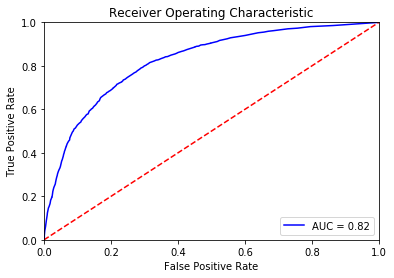

In [363]:
#ROC Curve
probs = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs, pos_label=1.)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

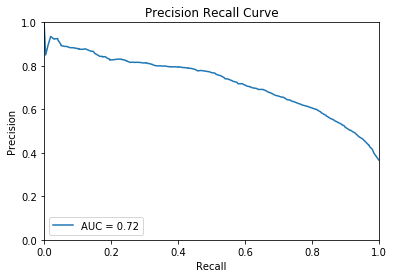

In [364]:
#Precision Recall Curve
probs = y_prob[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs, pos_label=1.)
prc_auc = metrics.auc(recall, precision)

plt.title("Precision Recall Curve")
plt.plot(recall, precision, label= 'AUC = %0.2f' % prc_auc)
plt.legend(loc = 'lower left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [365]:
#Feature importances
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = rf_model.feature_importances_
feature_importances.sort_values(by='importance', ascending=False).head(20)

,feature,importance
0,avg_dist,0.328927
6,weekday_pct,0.130519
1,avg_rating_by_driver,0.102586
2,avg_rating_of_driver,0.086722
5,trips_in_first_30_days,0.082680
4,surge_pct,0.070072
3,avg_surge,0.061126
7,x0_King's Landing,0.056059
9,x1_iPhone,0.037400
10,x2_True,0.027573


It appears the most important features are the average distance per trip in the first 30 days, the percentage of the user's trips that occured on a weekday, and the average rating by the driver. Let's explore these features more:

Not retained mean: 6.1716878818737335
Retained mean: 5.117754125412585


Ttest_indResult(statistic=-21.5741770773489, pvalue=1.0075122966990254e-102)

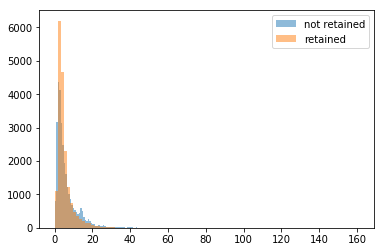

In [366]:
#Inspect Average Distance
retained = modified_ultimate.loc[modified_ultimate.retained == 1]["avg_dist"]
not_retained = modified_ultimate.loc[modified_ultimate.retained == 0]["avg_dist"]

plt.hist(not_retained, bins = 100, alpha=0.5, label="not retained")
plt.hist(retained, bins = 100, alpha=0.5, label="retained")
plt.legend()
plt.show

print("Not retained mean: {}".format(not_retained.mean()))
print("Retained mean: {}".format(retained.mean()))
ttest_ind(retained, not_retained, equal_var=False)

It appears that retained users tend to take shorter trips

Not retained mean: 4.786389954943171
Retained mean: 4.763121968023268


Ttest_indResult(statistic=-6.250880169168685, pvalue=4.114963557381491e-10)

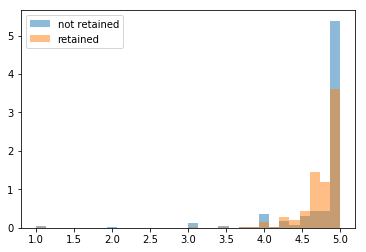

In [346]:
#Inspect Average Rating by Driver
retained = modified_ultimate.loc[modified_ultimate.retained == 1]["avg_rating_by_driver"]
not_retained = modified_ultimate.loc[modified_ultimate.retained == 0]["avg_rating_by_driver"]

plt.hist(not_retained, bins = 30, alpha=0.5, label="not retained", density=True)
plt.hist(retained, bins = 30, alpha=0.5, label="retained", density=True)
plt.legend()
plt.show

print("Not retained mean: {}".format(not_retained.mean()))
print("Retained mean: {}".format(retained.mean()))
ttest_ind(retained, not_retained, equal_var=False)

It appears that retained users had lower average ratings by the driver. However it should be noted those with exactly 3, 4, or 5 average scores are more likely not to be retained. This is perhaps due to the law of large numbers, as those who have only rode once or twice are more likely to have non-fractional average ratings values, and those who have only used the service a couple times are less likely to have used the service in the last 30 days and therefore less likely to be retained.

Not retained mean: 60.139282077392906
Retained mean: 62.17078107810796


Ttest_indResult(statistic=6.42352351772281, pvalue=1.3440868825810925e-10)

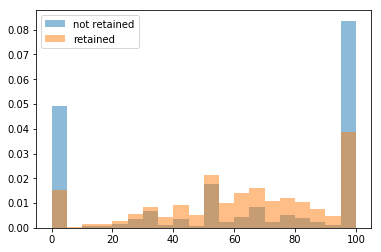

In [335]:
#Inspect Weekday Percentage
retained = modified_ultimate.loc[modified_ultimate.retained == 1]["weekday_pct"]
not_retained = modified_ultimate.loc[modified_ultimate.retained == 0]["weekday_pct"]

plt.hist(not_retained, bins = 20, alpha=0.5, label="not retained", density=True)
plt.hist(retained, bins = 20, alpha=0.5, label="retained", density=True)
plt.legend()
plt.show

print("Not retained mean: {}".format(not_retained.mean()))
print("Retained mean: {}".format(retained.mean()))
ttest_ind(retained, not_retained, equal_var=False)

This is very interesting as those whose weekday percentage is 0 or 100 are very likely not retained, where as those in the middle are likely to be retained. This is perhaps due to the law of large numbers. Those whose percentage is 100 or 0 are more likely to only have used the service once or twice, whereas those with middle percentages are more likely to have used the service a number of times. Because the former users use it so infrequently, they are more likely to not be retained.

Based on these results, the most compelling is the that retained users have a shorter average distance of trips. This might suggest that it would be wise for Ultimate to find ways to cater to riders who take shorter trips, as they are more likely to continue to use the service. This must be balanced however with the additional profit made from longer trips.